In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
# Import DataFrame
file_path = 'Measurement_summary.csv'
df = pd.read_csv(file_path)
print("DataSet = {:,d} rows and {} columns".format(df.shape[0], df.shape[1]))

print("\nAll Columns:\n=>", df.columns.tolist())

quantitative = [f for f in df.columns if df.dtypes[f] != 'object']
qualitative = [f for f in df.columns if df.dtypes[f] == 'object']

print("\nStrings Variables:\n=>", qualitative,
      "\n\nNumerics Variables:\n=>", quantitative)

df.head()

DataSet = 647,511 rows and 11 columns

All Columns:
=> ['Measurement date', 'Station code', 'Address', 'Latitude', 'Longitude', 'SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']

Strings Variables:
=> ['Measurement date', 'Address'] 

Numerics Variables:
=> ['Station code', 'Latitude', 'Longitude', 'SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']


,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0


In [4]:
df_gas_info = pd.read_csv('Measurement_item_info.csv')
df_gas_info

,Item code,Item name,Unit of measurement,Good(Blue),Normal(Green),Bad(Yellow),Very bad(Red)
0,1,SO2,ppm,0.02,0.05,0.15,1.0
1,3,NO2,ppm,0.03,0.06,0.20,2.0
2,5,CO,ppm,2.00,9.00,15.00,50.0
3,6,O3,ppm,0.03,0.09,0.15,0.5
4,8,PM10,Mircrogram/m3,30.00,80.00,150.00,600.0
5,9,PM2.5,Mircrogram/m3,15.00,35.00,75.00,500.0


In [5]:
list_cols = list(df_gas_info.columns)[3:]

level_dangerous = {}
for i in range(len(df_gas_info)):
    name = df_gas_info["Item name"][i]
    level_dangerous[name] = df_gas_info[list_cols].loc[i].tolist()
    
level_dangerous

{'SO2': [0.02, 0.05, 0.15, 1.0],
 'NO2': [0.03, 0.06, 0.2, 2.0],
 'CO': [2.0, 9.0, 15.0, 50.0],
 'O3': [0.03, 0.09, 0.15, 0.5],
 'PM10': [30.0, 80.0, 150.0, 600.0],
 'PM2.5': [15.0, 35.0, 75.0, 500.0]}

In [6]:
df['Address'].value_counts().head(3)

71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Republic of Korea    25906
369, Yongmasan-ro, Jungnang-gu, Seoul, Republic of Korea         25906
10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic of Korea            25905
Name: Address, dtype: int64

In [7]:
df['Address'] = df['Address'].map(lambda street: street.split(',')[2].strip())
df['Address'].value_counts().head(3)

Jungnang-gu    25906
Gangseo-gu     25906
Songpa-gu      25905
Name: Address, dtype: int64

In [8]:
df = df.drop(['Latitude', 'Longitude', 'Station code'], axis = 1).rename( columns = {'Address': 'District', 'Measurement date': 'Date'})
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Date      647511 non-null  datetime64[ns]
 1   District  647511 non-null  object        
 2   SO2       647511 non-null  float64       
 3   NO2       647511 non-null  float64       
 4   O3        647511 non-null  float64       
 5   CO        647511 non-null  float64       
 6   PM10      647511 non-null  float64       
 7   PM2.5     647511 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 39.5+ MB


In [10]:
df.head()

,Date,District,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00:00,Jongno-gu,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00:00,Jongno-gu,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00:00,Jongno-gu,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00:00,Jongno-gu,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00:00,Jongno-gu,0.003,0.051,0.002,1.2,69.0,61.0


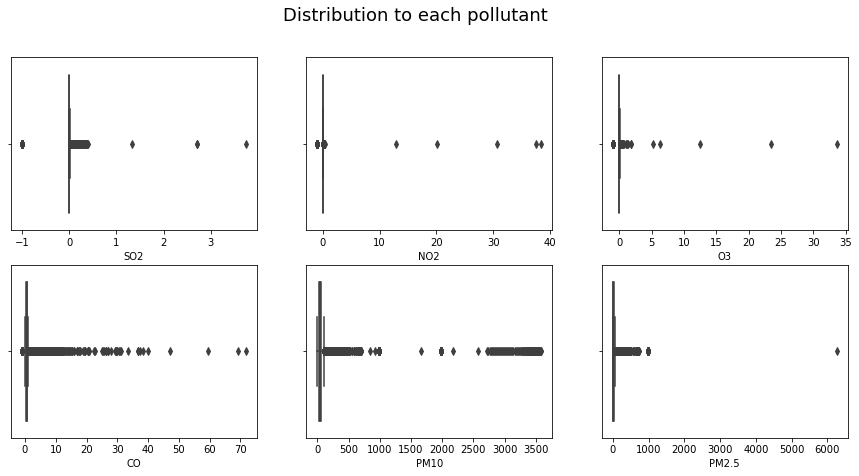

In [12]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(ncols=3, nrows=2, figsize=(15, 7), sharex=False)

map_feat_ax = {'SO2': ax1, 'NO2': ax2, 'O3': ax3, 'CO': ax4, 'PM10': ax5, 'PM2.5': ax6}

for key, value in map_feat_ax.items():
    sns.boxplot(x=df[key], ax=value)
    
fig.suptitle('Distribution to each pollutant', fontsize=18)
    
plt.show()

In [13]:
gas_list = list(map_feat_ax.keys())

list_describes = []
for f in gas_list:
    list_describes.append(df[f].describe())

df_describe_gas = pd.concat(list_describes, axis = 1)
df_describe_gas   

,SO2,NO2,O3,CO,PM10,PM2.5
count,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000
mean,-0.001795,0.022519,0.017979,0.509197,43.708051,25.411995
std,0.078832,0.115153,0.099308,0.405319,71.137342,43.924595
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.003000,0.016000,0.008000,0.300000,22.000000,11.000000
50%,0.004000,0.025000,0.021000,0.500000,35.000000,19.000000
75%,0.005000,0.038000,0.034000,0.600000,53.000000,31.000000
max,3.736000,38.445000,33.600000,71.700000,3586.000000,6256.000000


In [16]:
df.shape

(647511, 12)

In [17]:
condicional = df[gas_list] > 0.0

df = df[condicional.all(axis=1)]
df.shape

(632447, 12)

In [18]:
from scipy import stats

z = np.abs(stats.zscore(df[gas_list]))

threshold = 2

df = df[(z < 2).all(axis=1)]
df.shape

(616336, 12)

In [19]:
df['Year']  = pd.DatetimeIndex(df['Date']).year
df['Month']  = pd.DatetimeIndex(df['Date']).month
df['Weekday'] = pd.DatetimeIndex(df['Date']).strftime("%A")
df['Semester'] = ((pd.DatetimeIndex(df['Date']).month.astype(int) - 1) // 6) + 1

# show new columns
df.head(3)

,Date,District,SO2,NO2,O3,CO,PM10,PM2.5,Year,Month,Weekday,Semester
0,2017-01-01 00:00:00,Jongno-gu,0.004,0.059,0.002,1.2,73.0,57.0,2017,1,Sunday,1
1,2017-01-01 01:00:00,Jongno-gu,0.004,0.058,0.002,1.2,71.0,59.0,2017,1,Sunday,1
2,2017-01-01 02:00:00,Jongno-gu,0.004,0.056,0.002,1.2,70.0,59.0,2017,1,Sunday,1


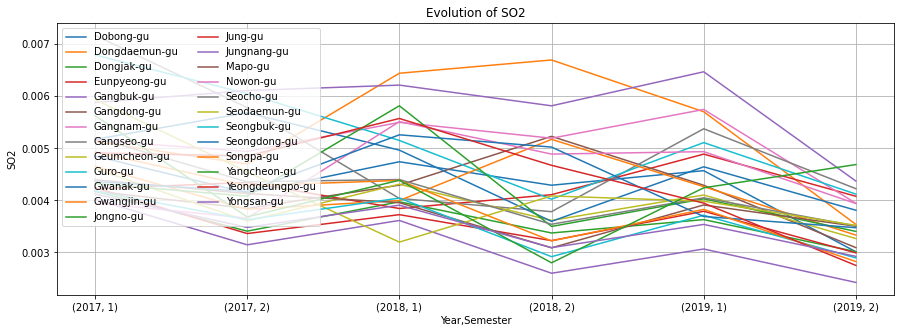

In [24]:
fig, ax = plt.subplots(figsize=(15,5))

df.groupby(['Year','Semester', 'District']).mean()['SO2'].unstack().plot(ax=ax)
ax.set_ylabel("SO2")
ax.set_title("S02 Evolution")
ax.set_title("Evolution of SO2")
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=2)
plt.grid(True)

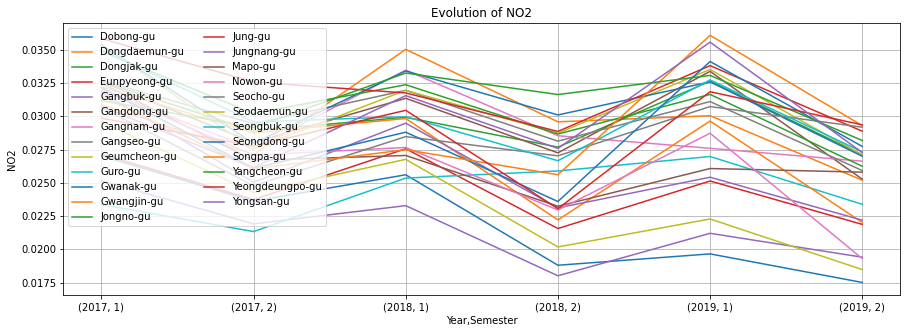

In [25]:
fig, ax = plt.subplots(figsize=(15,5))

df.groupby(['Year','Semester', 'District']).mean()['NO2'].unstack().plot(ax=ax)
ax.set_ylabel("NO2")
ax.set_title("N02 Evolution")
ax.set_title("Evolution of NO2")
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=2)
plt.grid(True)

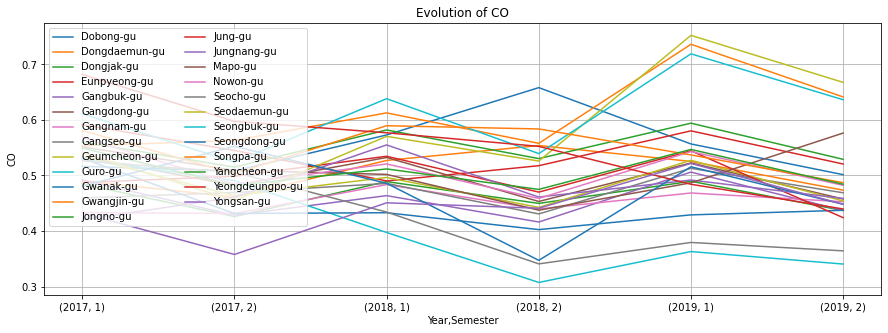

In [26]:
fig, ax = plt.subplots(figsize=(15,5))

df.groupby(['Year','Semester', 'District']).mean()['CO'].unstack().plot(ax=ax)
ax.set_ylabel("CO")
ax.set_title("CO Evolution")
ax.set_title("Evolution of CO")
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=2)
plt.grid(True)

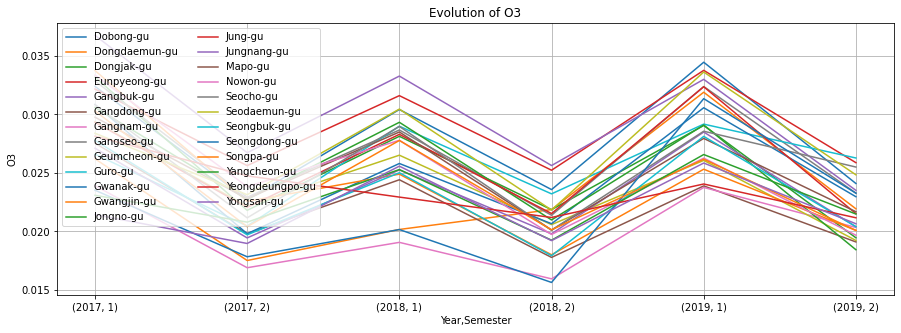

In [27]:
fig, ax = plt.subplots(figsize=(15,5))

df.groupby(['Year','Semester', 'District']).mean()['O3'].unstack().plot(ax=ax)
ax.set_ylabel("O3")
ax.set_title("O3 Evolution")
ax.set_title("Evolution of O3")
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=2)
plt.grid(True)

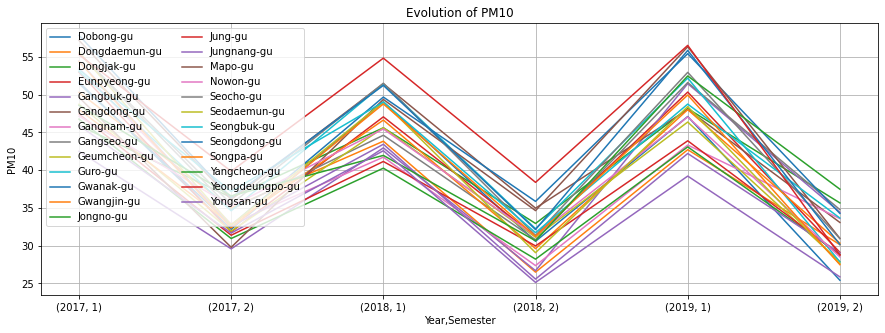

In [28]:
fig, ax = plt.subplots(figsize=(15,5))

df.groupby(['Year','Semester', 'District']).mean()['PM10'].unstack().plot(ax=ax)
ax.set_ylabel("PM10")
ax.set_title("PM10 Evolution")
ax.set_title("Evolution of PM10")
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=2)
plt.grid(True)

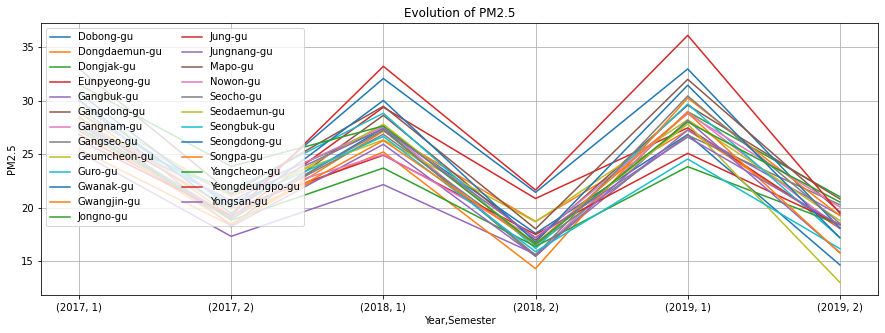

In [29]:
fig, ax = plt.subplots(figsize=(15,5))

df.groupby(['Year','Semester', 'District']).mean()['PM2.5'].unstack().plot(ax=ax)
ax.set_ylabel("PM2.5")
ax.set_title("PM2.5 Evolution")
ax.set_title("Evolution of PM2.5")
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=2)
plt.grid(True)

In [30]:
df.tail()

,Date,District,SO2,NO2,O3,CO,PM10,PM2.5,Year,Month,Weekday,Semester
647506,2019-12-31 19:00:00,Gangdong-gu,0.003,0.028,0.013,0.5,23.0,17.0,2019,12,Tuesday,2
647507,2019-12-31 20:00:00,Gangdong-gu,0.003,0.025,0.015,0.4,25.0,19.0,2019,12,Tuesday,2
647508,2019-12-31 21:00:00,Gangdong-gu,0.003,0.023,0.015,0.4,24.0,17.0,2019,12,Tuesday,2
647509,2019-12-31 22:00:00,Gangdong-gu,0.003,0.040,0.004,0.5,25.0,18.0,2019,12,Tuesday,2
647510,2019-12-31 23:00:00,Gangdong-gu,0.003,0.037,0.005,0.5,27.0,18.0,2019,12,Tuesday,2
